<a href="https://colab.research.google.com/github/kev1092/Lab1/blob/main/Lab1_Color_and_Convolutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [79]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

# Libraries and images

We encode images as 3 dimensional tensors. In each image we have spatial information, represented as row and column coordinates in the image, and channel information that combines together to form the color.

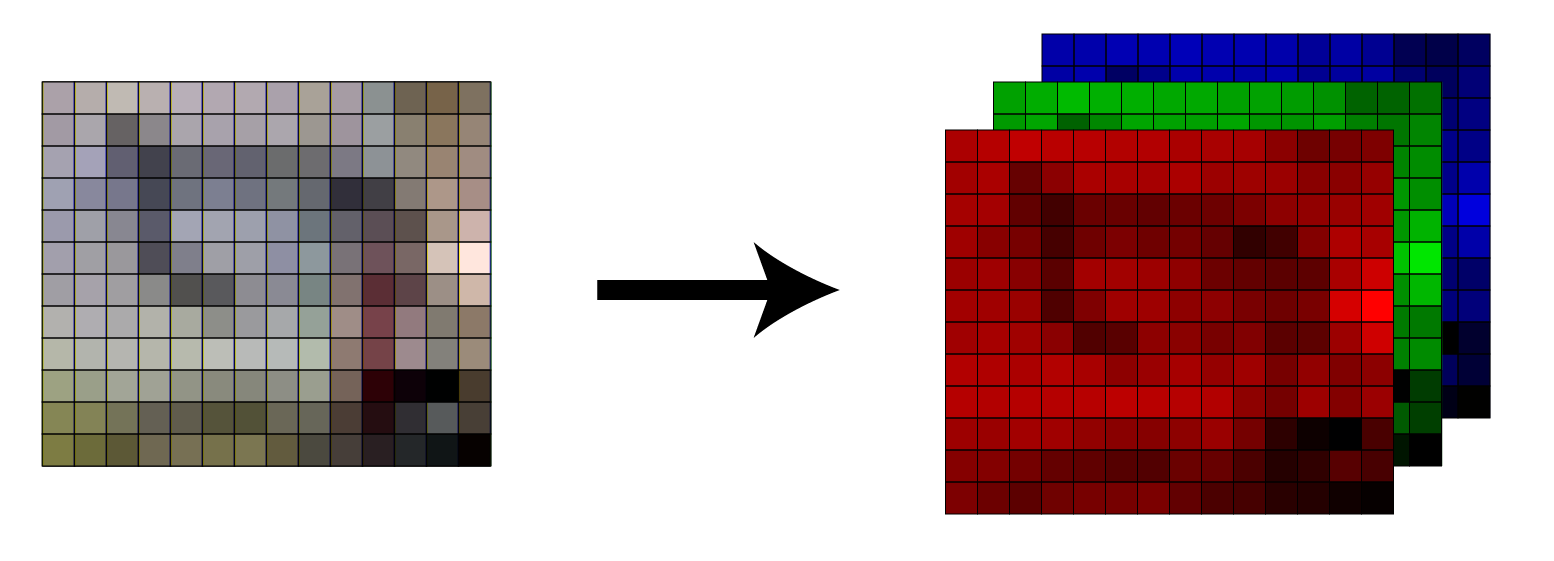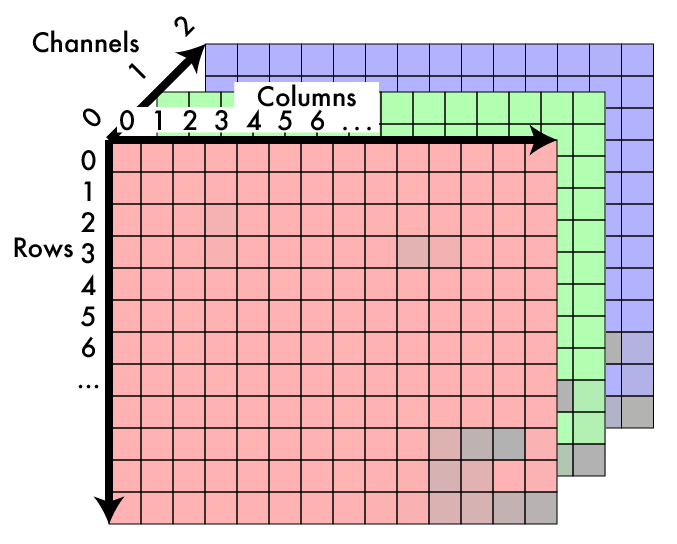

Since images are encode as arrays/matrices/tensors, the coordinate system usually starts on the top-left corner.

There are several color systems RGB, BGR, HSV, CMYK... depending on the field and purpose of the image one or other are usually used. However the most common system is RGB, with each image being an array of unsigned 8-bits integers. So each pixel is formed by three channel information, representing the intensity of red, green and blue respectively ranging from 0 to 255. However, each library has their own particularities see the example below




Let's import our first image! First open the file on your computer and check how it looks like!

Let's import it with OpenCV library. OpenCV is one of the most common and oldest libraries especialised for computer vision projects!

please remember to import your image to the working environment before executing this!

In [80]:
img = cv2.imread("image-test.png")

perfect! let's check the image out! Let's use matplotlib for that

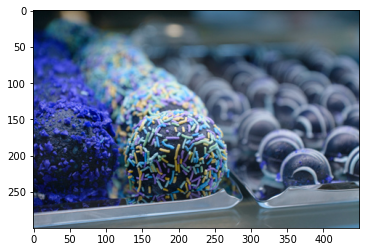

In [81]:
plt.imshow(img)

hmmm... something seems off... the image looks much more blue than it should. Let's try using a function from the OpenCV library

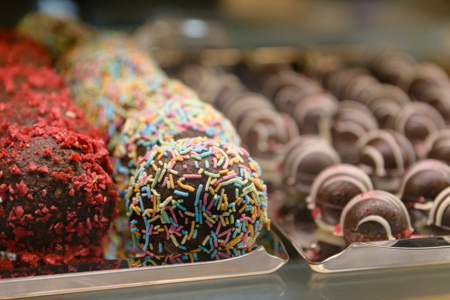

In [82]:
# We have to use this function because of the jupyter environment and the way that OpenCV imshow works. 
# The original function would be cv2.imshow
from google.colab.patches import cv2_imshow 
cv2_imshow(img)

Now it looks good! But why is that?

Well even though as we said earlier the custom is to use RGB and uint8 type for images, OpenCV works on a Blue,Green,Red(BGR) system while matplotlib was expecting an RGB image. The reason of this seems to be backward-compatibility and historical reasons, from a time when BGR was popular among camera manufacturers and software providers.

Furthermore, let's check the following case

In [83]:
img = plt.imread("image-test.png")

Now let's check the actual image pixel values

In [84]:
print("maximum pixel value in the image: {}".format(np.max(img)))
print("minimum pixel value in the image: {}".format(np.min(img)))

maximum pixel value in the image: 1.0
minimum pixel value in the image: 0.0


It seems that the pixel values are float and in the range 0-1 but why is that? Well... matplotlib import "png" images like that! 
So, what is the moral of this story? Be careful! even though the common case is treating images as RGB (or grayscale) and with pixel values in the range [0,255], each library and framework can have their own particularities even for simple things as reading/importing images further than notation/arguments! This can be a problem when using functions from different libraries

# Color

Humans do not see colors equally. Next image show the human eye's sensitivity for different colors
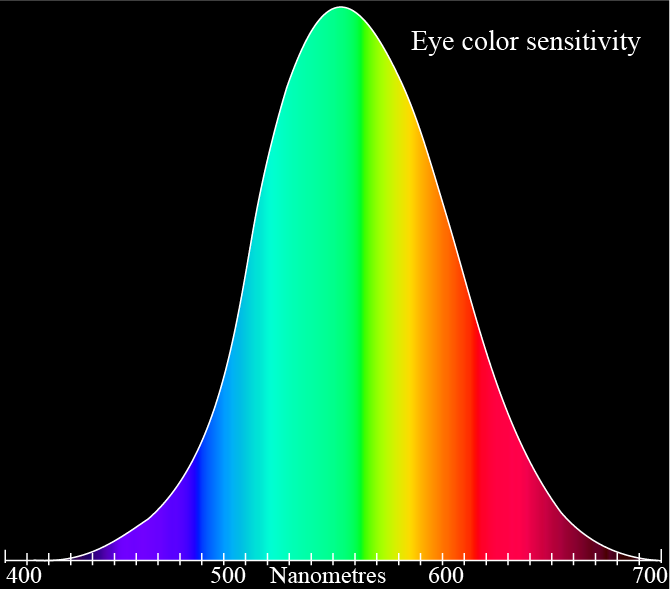

We can see that we are much more sensitive to shades of green than purple or dark red. Let's see how this affect some CV applications, for example transforming color images to black and white.

Intuitively, if we would like to transform an RGB image to a gray one, we would try to do the average value of the RGB channels per pixel to create a the gray one.

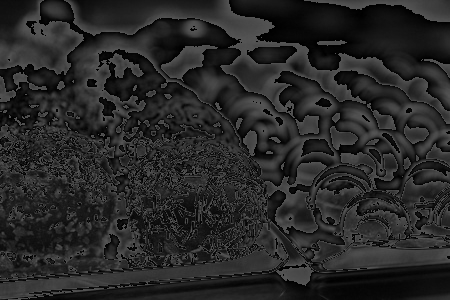

In [132]:
# TO DO: take the average pixel value of our image and display it, for example use the OpenCV library

img = cv2.imread("image-test.png")

# take the average pixel value (you can use whatever library you want or just do normal python idexing) OBS! remember that the image format is (rows,columns,channels)
#img2 = ...
img2 = ((img[:,:,0]+img[:,:,1]+img[:,:,2])/3).astype("uint8")
cv2_imshow(img2)


Well... that seems completely off, not our typical black and white image... execute the following code to see how it should look like

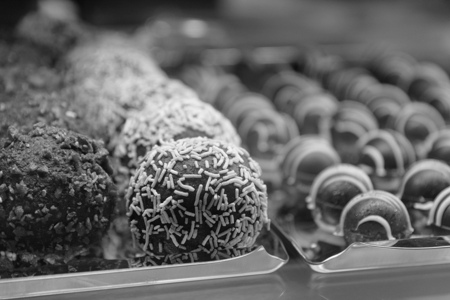

In [86]:
cv2_imshow(cv2.cvtColor(img,cv2.COLOR_BGR2GRAY))

Now  it looks much better, but why? 

Well as we saw earlier in the figure about color sensitivity, we do not percieve all colors in the same way. So instead of calculating the average pixel value, we are going to do a weighted sum. Video engineers use a calculation called luma to find an approximation of perceptual intensity when encoding video signal, we'll use that to convert our image to grayscale. It operates directly on the gamma compressed sRGB values that we already have! We simply perform a weighted sum:

Y' = 0.299 R' + 0.587 G' + .114 B'

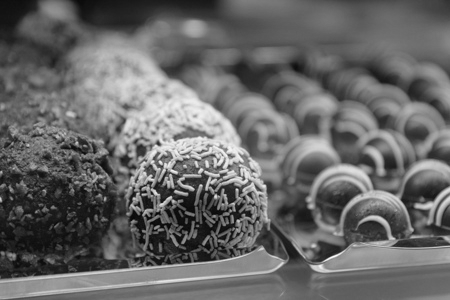

In [135]:
# TO DO: use the weighted sum from above to calculate your gray image

#imgg2 = ...

img2 = img[:,:,0]*0.114 + img[:,:,1]*0.587 + img[:,:,2]*0.299

# Now let's try again!

cv2_imshow(img2)

Now it looks much better! 

Now let's talk about other color spaces, for example, HSV. HSV stands for Hue, Saturation, Value. Hue can be thought of as the base color of a pixel. Saturation is the intensity of the color compared to white (the least saturated color). The Value is the perception of brightness of a pixel compared to black. You can try out this [demo](https://math.hws.edu/graphicsbook/demos/c2/rgb-hsv.html) to get a better feel for the differences between these two colorspaces. For a geometric interpretation of what this transformation:

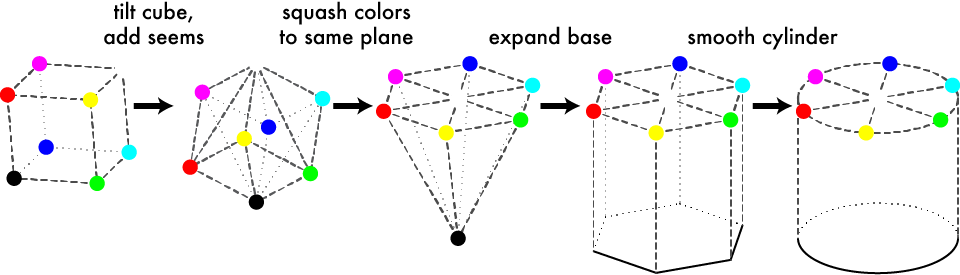

We can make use of these other representations to, for example, navigate through the colors/filter them/segment them in an easier way. 

For example let's see what is the Hue value for red



In [88]:
# let's get the reference for pure red

red_rgb = np.uint8([[[255,0,0 ]]]) #pure red in an RGB 
red_hsv = cv2.cvtColor(red_rgb,cv2.COLOR_RGB2HSV)

# let's see its value in HSV!

print("value for pure red color in HSV format: {}".format(red_hsv))

value for pure red color in HSV format: [[[  0 255 255]]]


We can see the actual color range in the Hue value in the following image. We can then select the range of color we want to segment out. Let's say we want to segment out the red content/sprinkles in the image. We can do that as following

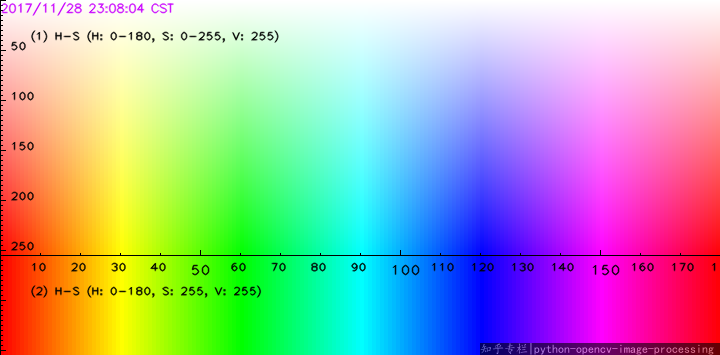

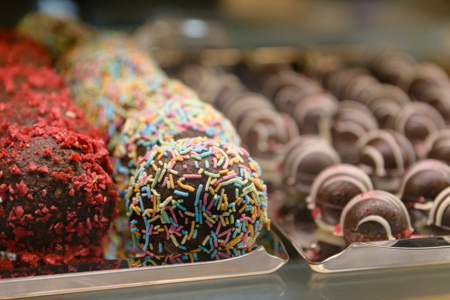

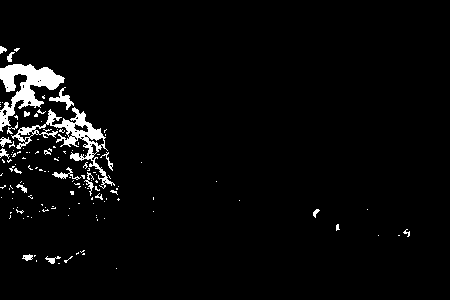

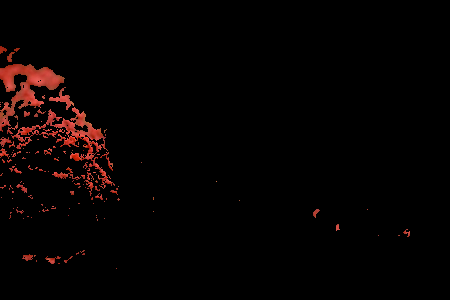

In [78]:

# We first transform our image to HSV

img3 = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)

# We then get our boundary region based on the Hue image from before 
# We see that red should be in the range (0-10) and (170-180)

# lower boundary RED color range values; Hue (0 - 10)
lower1 = np.array([0, 160, 150]) 
upper1 = np.array([10, 255, 255])
 
# upper boundary RED color range values; Hue (160 - 180)
lower2 = np.array([169,160,150])
upper2 = np.array([179,255,255])

# notice in the code above the values for saturation and brightness
# we have to still set some lower and upper boundary for these based on how dark and intense the color of our images are
# these values will affect the noise from dark regions/colors and of course the accuracy of our filter
 
# we create a mask representing the pixel that falls in our especified range
lower_mask = cv2.inRange(img3, lower1, upper1)
upper_mask = cv2.inRange(img3, lower2, upper2)
 
# we combine the mask from both regions to create a unique mask
# notice that we have to do this because of the "cut" for the red color in HSV
full_mask = lower_mask + upper_mask;

# Here we filter the pixels in the image with our mask
img3 = cv2.bitwise_and(img3, img3, mask=full_mask)

# we show back our images
cv2_imshow(img)
cv2_imshow(full_mask)
img3 = cv2.cvtColor(img3,cv2.COLOR_HSV2BGR)
cv2_imshow(img3)


Done! We can see that we effectively has segmented red regions in the image! We can see, however, it is not perfect, there are some regions missing, so we may need to further tune some parameters and some very small regions that we may want to remove doing some extra post-processing.

As we saw we can use HSV for things like image filter/segmentation and use it for more advance applications like object detection/tracking. In the case of RGB, the relation between channels for specific color formation is not as direct.

# Image Filtering

One of the most common and powerful operations that we can do with an image is to use a filter on it. In this lab we will be using gaussian filter to blur an image (low-pass filter), extract high frequency components (high-pass filter) and how they can be used to downsize images, as well as to enhance contrast!


In [138]:
# we create the grid for our filter

sigma = 2
x, y = np.meshgrid(np.arange(-3*sigma,3*sigma+1,1), np.arange(-3*sigma,3*sigma+1,1))

# create the actual filter
filt = np.exp(-( (x**2+y**2) / ( 2.0 * sigma**2 ) ) )
filt = filt/np.sum(filt)



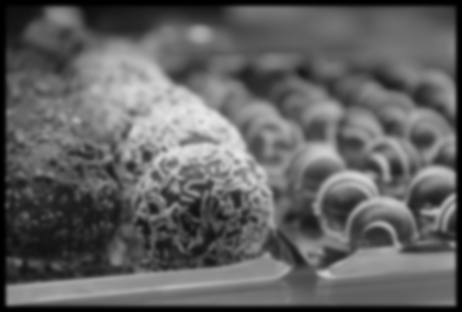

In [139]:
from scipy import signal

res = signal.convolve2d(img2,filt)

cv2_imshow(res)